In [88]:
import wfdb
from wfdb import processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import scipy
PATH = "apnea-ecg-database-1.0.0/"

SAMPFROM = 6000
SAMPTO = 11000

In [44]:
record_ecg = wfdb.rdrecord(PATH + "a01", sampfrom=SAMPFROM, sampto=SAMPTO)
annotation = wfdb.rdann(PATH+ "a01", 'qrs', sampfrom=SAMPFROM, sampto=SAMPTO, shift_samps=True)

df2 = record_ecg.to_dataframe()
df2['time'] = df2.index.microseconds / 1000 + df2.index.seconds * 1000
df2 = df2[['time', 'ECG']]
df2.reset_index(drop=True, inplace=True)
df2.head()

,time,ECG
0,0.0,0.140
1,10.0,0.170
2,20.0,0.215
3,30.0,0.245
4,40.0,0.250


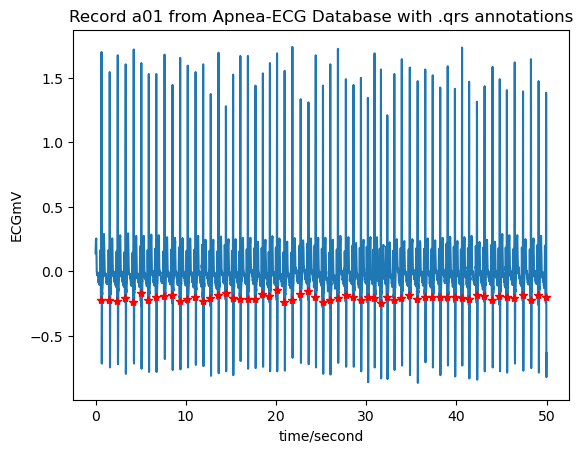

In [45]:
wfdb.plot_wfdb(record=record_ecg, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .qrs annotations',
               time_units='seconds')

[  62  153  242  329  419  503  586  669  761  848  934 1018 1105 1189
 1273 1358 1441 1520 1601 1685 1769 1850 1928 2007 2092 2178 2270 2356
 2437 2517 2598 2683 2771 2856 2938 3015 3089 3160 3230 3308 3391 3479
 3566 3651 3734 3816 3900 3980 4059 4137 4224 4308 4397 4477 4556 4643
 4735 4823 4908 4991]
[91. 89. 87. 90. 84. 83. 83. 92. 87. 86. 84. 87. 84. 84. 85. 83. 79. 81.
 84. 84. 81. 78. 79. 85. 86. 92. 86. 81. 80. 81. 85. 88. 85. 82. 77. 74.
 71. 70. 78. 83. 88. 87. 85. 83. 82. 84. 80. 79. 78. 87. 84. 89. 80. 79.
 87. 92. 88. 85. 83.]


Text(0.5, 1.0, 'Fragment zapisu EKG dla jednego uderzenia')

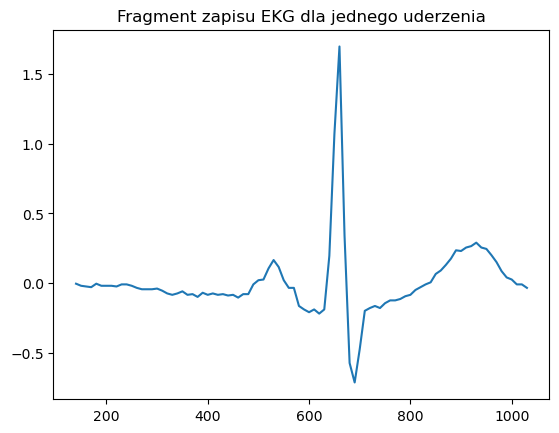

In [46]:
#przetwarzanie danych timeeeeeeee
print(annotation.sample)
num_of_beats = annotation.sample.size - 1
offset_l = 20
offset_r = 70

temp = np.zeros(num_of_beats)

for beat in range(num_of_beats):
    temp[beat] = annotation.sample[beat+1] - annotation.sample[beat]
print(temp)

#test czy to pojedyncze bicie

plt.plot(df2['time'][34 - offset_l:34+offset_r], df2['ECG'][34 - offset_l:34 + offset_r])
plt.title('Fragment zapisu EKG dla jednego uderzenia')

In [47]:
beats = np.zeros((num_of_beats, offset_l+offset_r))

for beat in range(num_of_beats):
    start_pos = annotation.sample[beat]
    beats[beat] = df2['ECG'][start_pos-offset_l:start_pos+offset_r]



In [48]:
#jakas zabawa
# qrs_inds = processing.qrs.gqrs_detect(sig=record_ecg.p_signal[:,0], fs=200)
# qrs_inds = (1 / record_ecg.fs) * qrs_inds
# # print(qrs_inds.size)
# # Utwórz nowy wykres i oś
# signal = record_ecg.p_signal[:, 0]
# time = (1 / record_ecg.fs) * np.arange(len(signal))

# # Utwórz nowy wykres
# fig, ax = plt.subplots()

# # Wyświetl sygnał EKG na wykresie
# ax.plot(time, signal)

# # Wygeneruj i wyrysuj dodatkowe punkty na tym samym wykresie
# ax.plot(qrs_inds, np.zeros(qrs_inds.size), 'ro')  # 'ro' oznacza czerwone kropki

# # Wyświetl wykres z dodatkowymi punktami i etykietami
# plt.show()

In [49]:
scaler = StandardScaler()
scaler.fit(beats)
X_scaled = scaler.transform(beats)

In [50]:
pca = decomposition.PCA(n_components=4)
X_transformed = pca.fit_transform(X_scaled)

In [51]:
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_
# print(eigen_vectors)
print(eigen_values)

[20.20669268 15.5999887   8.34546024  7.23090149]


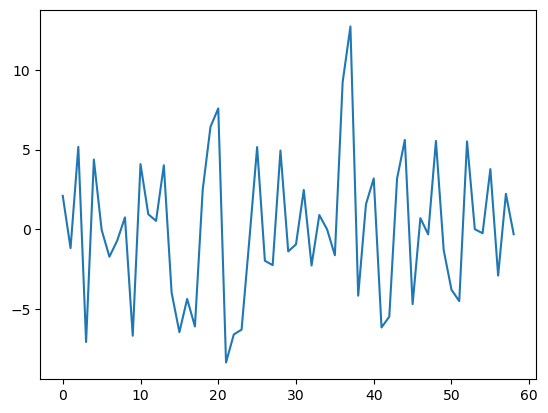

In [52]:
# plt.plot(df2.ECG)
plt.plot(X_transformed[:,0])
# plt.plot(X_transformed[:,1])
# plt.plot(X_transformed[:,2])
# plt.plot(X_transformed[:,3])
# plt.xlim(0, 100)

In [53]:
X_transformed

array([[ 2.08917471e+00, -7.53025118e-01,  2.50318518e+00,
        -1.95417047e+00],
       [-1.19393432e+00, -2.14247785e-01,  2.66015122e+00,
         1.74421919e-01],
       [ 5.16711590e+00, -1.12004502e+00,  3.44257819e+00,
        -3.54293135e+00],
       [-7.09201033e+00, -2.24821512e+00,  4.69247503e+00,
        -3.61739556e-01],
       [ 4.37209348e+00, -5.92666407e-01,  1.24710247e+00,
        -2.57112629e+00],
       [-4.73420992e-02,  1.58149720e+00,  2.65315119e+00,
        -2.93387029e+00],
       [-1.73452552e+00, -1.71827890e+00,  4.63446896e+00,
        -3.43423645e+00],
       [-7.24321674e-01, -3.75560786e+00,  2.84597776e+00,
        -7.05111895e-01],
       [ 7.36879885e-01,  2.44706730e-01,  2.08246930e+00,
         7.69963140e-01],
       [-6.70109300e+00, -1.56736831e+00,  8.80680285e-01,
         3.66854726e+00],
       [ 4.08287698e+00, -1.43522969e+00,  7.45329581e-01,
        -2.06425315e+00],
       [ 9.36837408e-01, -9.82788623e-02,  3.05998767e+00,
      

In [54]:
record = wfdb.rdrecord(PATH + "a01r", sampfrom=SAMPFROM, sampto=SAMPTO)

df = record.to_dataframe()
df['time'] = df.index.microseconds / 1000 + df.index.seconds * 1000
df = df[['time', 'Resp C', 'Resp A', 'Resp N']]
df.reset_index(drop=True, inplace=True)
df.head()

,time,Resp C,Resp A,Resp N
0,0.0,-0.02935,0.03355,-0.11655
1,10.0,-0.03055,0.03295,-0.11795
2,20.0,-0.03180,0.03235,-0.11935
3,30.0,-0.03305,0.03175,-0.12075
4,40.0,-0.03430,0.03115,-0.12215


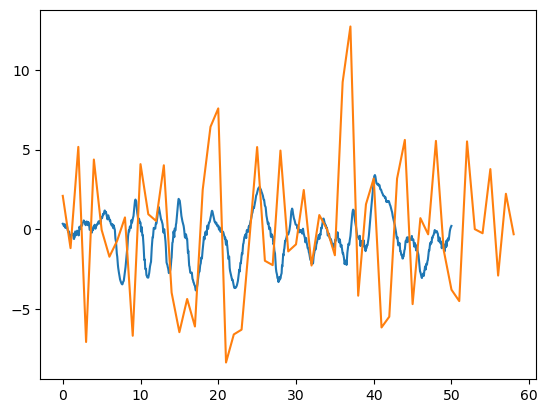

In [55]:
#plt.plot(df2['time'], df2['ECG'])
# plt.plot(df['time'], df['Resp C'])
plt.plot(df['time']/1000, df['Resp A']*10)
# plt.plot(df['time'], df['Resp N'])


plt.plot(X_transformed[:,0])

In [56]:
y_resp_norm = (df['Resp A']-min(df['Resp A'])) / max(df['Resp A']-min(df['Resp A']))
y_PCA_norm = (X_transformed[:,0]-min(X_transformed[:,0])) / max(X_transformed[:,0]-min(X_transformed[:,0]))
coeff = y_resp_norm.size/100 / y_PCA_norm.size

Text(0.5, 1.0, 'PCA nieprzeskalowane')

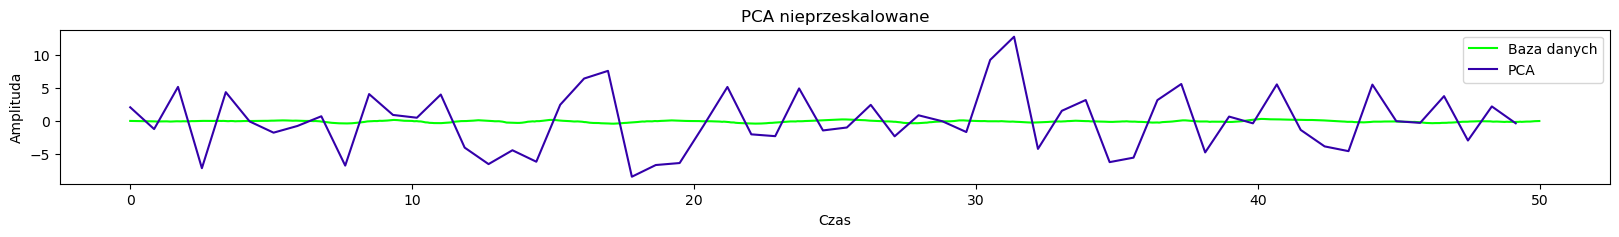

In [87]:
plt.figure(figsize=(20, 2))
plt.plot(df['time']/1000, df['Resp A'], label='Baza danych', color='lime')
plt.plot(np.arange(X_transformed[:,0].size)*coeff, X_transformed[:,0], label='PCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('PCA nieprzeskalowane')

(array([9.11092264e-01, 8.02467107e-01, 1.11054949e-01, 1.50080745e-01,
        6.71081443e-02, 1.67808524e-02, 1.22798627e-01, 8.01365502e-02,
        3.96872246e-02, 4.50954809e-02, 1.63018331e-02, 1.87309327e-02,
        2.66007424e-03, 1.01783081e-02, 2.74940780e-02, 3.72212160e-02,
        4.68576131e-02, 1.62042178e-02, 2.51945401e-02, 1.65208999e-02,
        3.53052661e-02, 2.77174658e-02, 2.83941921e-02, 1.81634180e-03,
        4.54320437e-03, 4.70468110e-02, 1.51224776e-02, 8.08407502e-02,
        5.22577934e-02, 3.04952203e-02, 5.51999038e-02, 4.58315867e-02,
        5.95959993e-02, 7.65224005e-02, 1.62159599e-02, 3.64477509e-02,
        5.56987790e-02, 1.17283493e-01, 2.56754321e-01, 2.31382079e-01,
        1.06694514e-01, 1.26782158e-01, 2.85295819e-01, 1.58867993e-01,
        6.41668838e-03, 2.92228493e-02, 2.53462693e-02, 6.24958312e-02,
        6.01350016e-02, 1.23845368e-01, 9.57493697e-02, 1.08354301e-02,
        8.81549115e-02, 7.36525769e-02, 4.36959957e-02, 5.819395

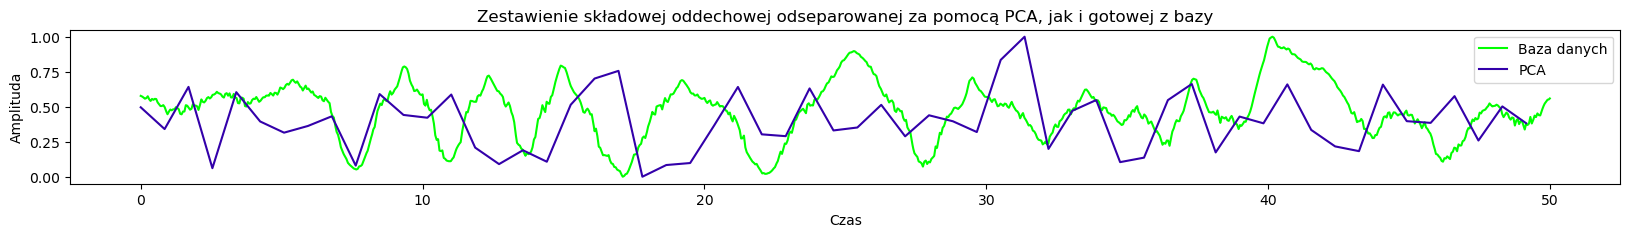

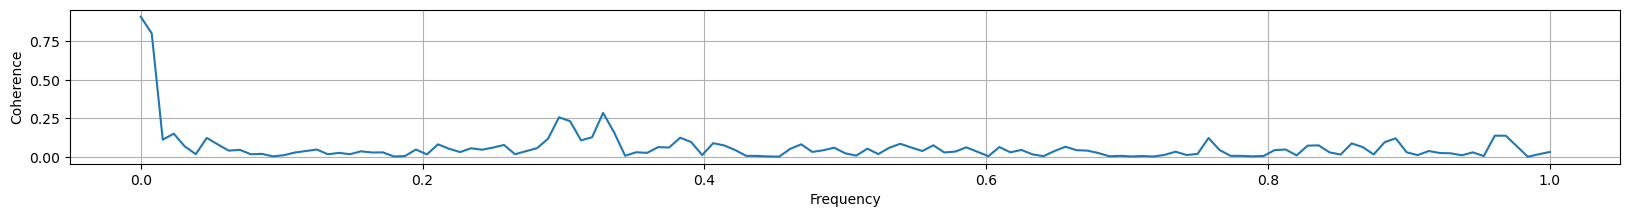

In [92]:
plt.figure(figsize=(20, 2))
plt.plot(df['time']/1000, y_resp_norm, label='Baza danych', color='lime')
plt.plot(np.arange(X_transformed[:,0].size)*coeff, y_PCA_norm, label='PCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title('Zestawienie składowej oddechowej odseparowanej za pomocą PCA, jak i gotowej z bazy')
# print(scipy.signal.coherence(y_resp_norm, y_PCA_norm))
plt.figure(figsize=(20, 2))
plt.cohere(y_resp_norm, y_PCA_norm)

In [59]:
kpca = decomposition.KernelPCA(n_components=4, kernel='cosine')
X_ktransformed = kpca.fit_transform(X_scaled)

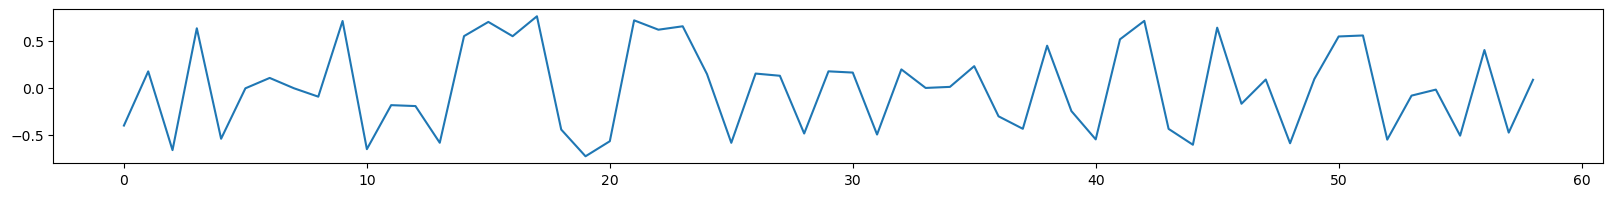

In [60]:
plt.figure(figsize=(20, 2))
plt.plot(X_ktransformed[:,0])

In [61]:
y_kPCA_norm = (X_ktransformed[:,0]-min(X_ktransformed[:,0])) / max(X_ktransformed[:,0]-min(X_ktransformed[:,0]))

Text(0.5, 1.0, "Zestawienie EDR z kPCA (kernel='cosine'), jak i gotowej z bazy")

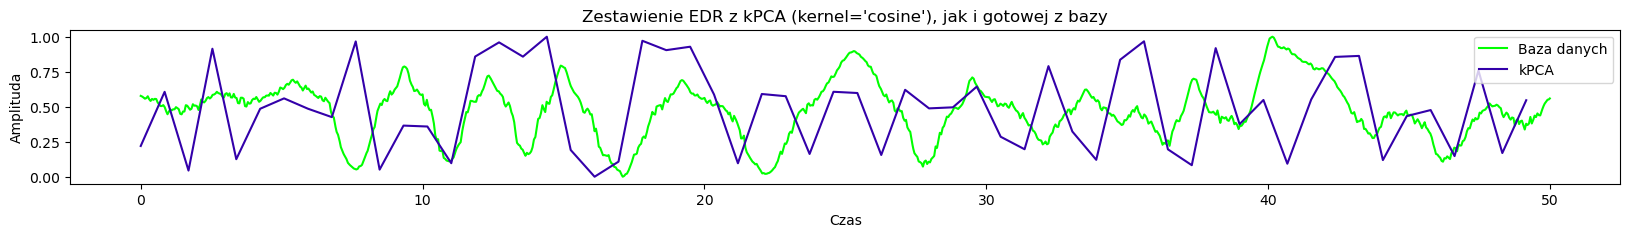

In [62]:
plt.figure(figsize=(20, 2))
plt.plot(df['time']/1000, y_resp_norm, label='Baza danych', color='lime')
plt.plot(np.arange(X_ktransformed[:,0].size)*coeff, y_kPCA_norm, label='kPCA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title(f"Zestawienie EDR z kPCA (kernel=\'{kpca.kernel}\'), jak i gotowej z bazy")

In [83]:
ica = decomposition.FastICA(n_components=4)
X_ica_transformed = ica.fit_transform(X_scaled)

d:\ProgramData\Anaconda3\envs\labki\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


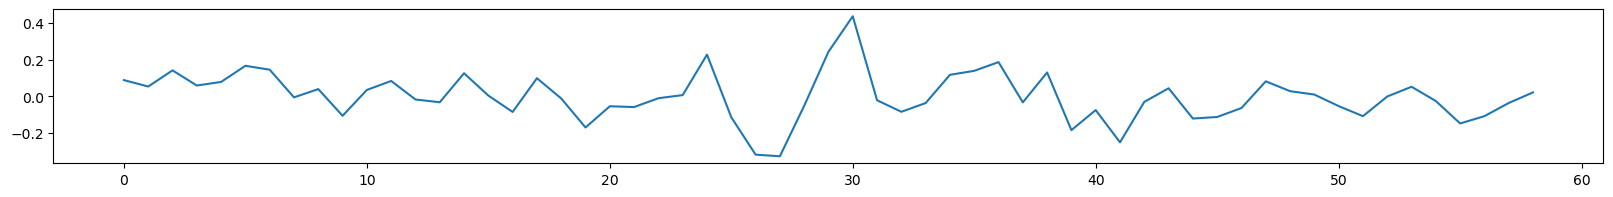

In [84]:
plt.figure(figsize=(20, 2))
plt.plot(X_ica_transformed[:,0])

In [85]:
y_ICA_norm = (X_ica_transformed[:,0]-min(X_ica_transformed[:,0])) / max(X_ica_transformed[:,0]-min(X_ica_transformed[:,0]))

Text(0.5, 1.0, 'Zestawienie EDR z ICA, jak i gotowej z bazy')

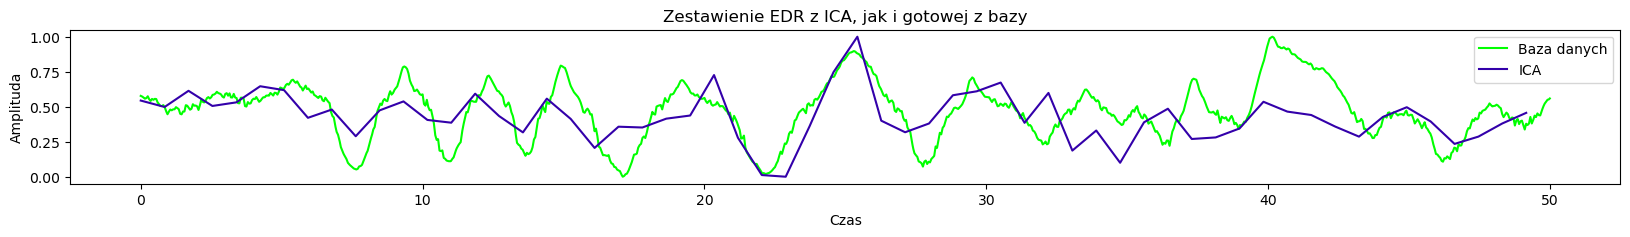

In [86]:
plt.figure(figsize=(20, 2))
plt.plot(df['time']/1000, y_resp_norm, label='Baza danych', color='lime')
plt.plot(np.arange(X_ktransformed[:,0].size)*coeff, y_ICA_norm, label='ICA', color=('#3300AA'))
plt.legend()

plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.title(f"Zestawienie EDR z ICA, jak i gotowej z bazy")